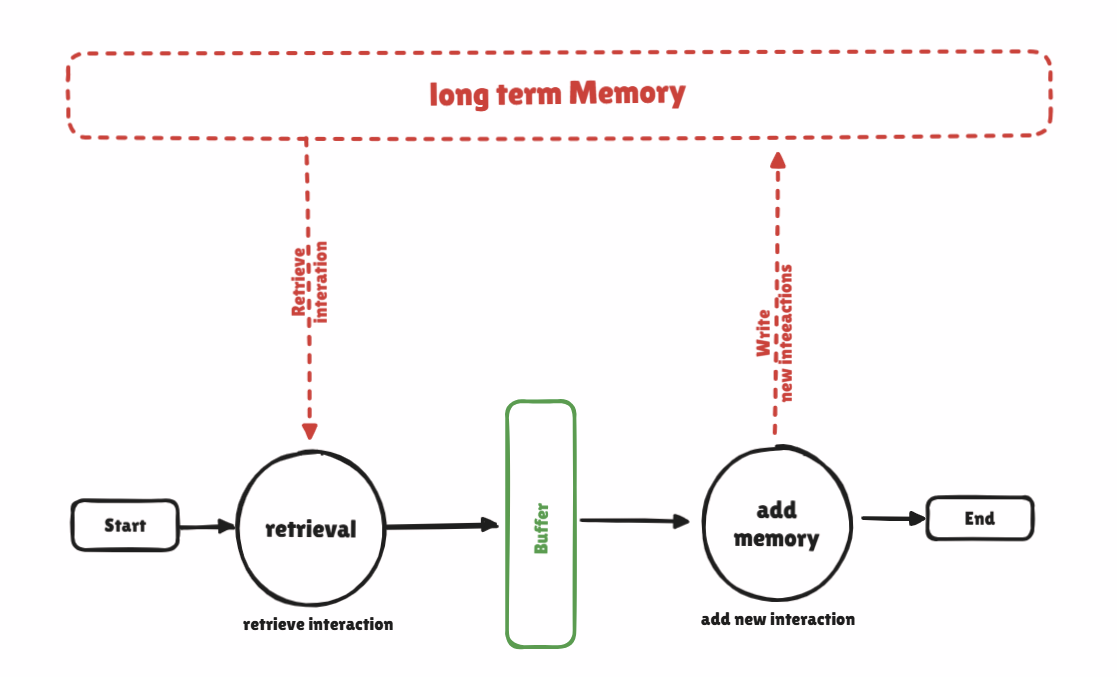

# memory init

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
import json
import os
from tqdm.notebook import tqdm, trange

from memory.memory_manager import MemoryManager, memory_initalize, set_memory
from simple_rag.rag_config import CHROMA_DB_PATH, BASE_URL, EMBEDDING_MODEL_NAME
from simple_rag.rag.run_rag import initialize_llm_client, run_simple_baseline

In [3]:
memory = MemoryManager(db_path=CHROMA_DB_PATH, embedding_model=EMBEDDING_MODEL_NAME, base_url=BASE_URL)
set_memory(memory)
llm_client = initialize_llm_client()

In [4]:
dir_path = "data/input/memory_init/memory_init_9"
# dir_path = "data/input/memory_init/memory_init_all"
files = os.listdir(dir_path)

for user in tqdm(files):
    with open(f'{dir_path}/{user}', 'r') as f:
        data = []
        for l in f:
            data.append(json.loads(l))

    memory_initalize(data[0], chunk_type='persona')
    for i in trange(len(data)):
        memory_initalize(data[i], chunk_type='interaction')

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

# Run

In [5]:
dir_path = "data/input/memory_init/input"
files = os.listdir(dir_path)

for fname in sorted(files):
    file_path = os.path.join(dir_path, fname)
    with open(file_path, "r", encoding="utf-8") as f:
        num_lines = sum(1 for _ in f)
    print(f"{fname}: {num_lines} lines")


u_01.jsonl: 94 lines
u_06.jsonl: 108 lines
u_08.jsonl: 110 lines
u_10.jsonl: 46 lines
u_11.jsonl: 41 lines
u_12.jsonl: 48 lines
u_14.jsonl: 86 lines
u_19.jsonl: 83 lines
u_44.jsonl: 80 lines


In [23]:
user = 'u_08'
test = 'half_init' # 'all_init
batch_size = 5
write_every_n_batches = 1

input_jsonl_path = f"data/input/memory_init/input/{user}.jsonl"
output_jsonl_path = f"data/output/{test}_{user}.jsonl"
progress_log_path = f"data/log/{test}_{user}.txt"
memory_log_path: str = f"data/log/memory_additions_{test}.txt"
debug=False

In [25]:
run_simple_baseline(
    input_jsonl_path=input_jsonl_path,
    output_jsonl_path=output_jsonl_path,
    memory_instance=memory,
    llm_client=llm_client,
    batch_size=batch_size,
    progress_log_path=progress_log_path,
    memory_log_path=memory_log_path,
    debug=debug
)

Loading data from data/input/memory_init/input/u_08.jsonl...
Loaded 110 interactions
Created 22 batches of size 5
Resuming from batch 19...


Processing batches:   0%|          | 0/22 [00:00<?, ?it/s]


Processing Batch 19/22 (5 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 5/5 [00:12<00:00,  2.48s/it]



Phase 2: Adding to Memory...


Processing batches:  86%|████████▋ | 19/22 [00:14<00:02,  1.34it/s]

  ✓ Batch 19 memory additions completed (5/5 successful)
  📊 Batch 19 Stats:
      Average Predicted Rating: 4.30
      Average True Rating: 4.80
      Prediction Error (MAE): 0.50

Processing Batch 20/22 (5 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]



Phase 2: Adding to Memory...


Processing batches:  91%|█████████ | 20/22 [00:30<00:03,  1.81s/it]

  ✓ Batch 20 memory additions completed (5/5 successful)
  📊 Batch 20 Stats:
      Average Predicted Rating: 4.30
      Average True Rating: 5.00
      Prediction Error (MAE): 0.70
💾 Writing intermediate results to data/output/half_init_u_08.jsonl...

Processing Batch 21/22 (5 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 5/5 [00:13<00:00,  2.70s/it]



Phase 2: Adding to Memory...


Processing batches:  95%|█████████▌| 21/22 [00:45<00:03,  3.07s/it]

  ✓ Batch 21 memory additions completed (5/5 successful)
  📊 Batch 21 Stats:
      Average Predicted Rating: 4.50
      Average True Rating: 5.00
      Prediction Error (MAE): 0.50

Processing Batch 22/22 (5 interactions)
Phase 1: Simple Prediction...


Making predictions: 100%|██████████| 5/5 [00:10<00:00,  2.19s/it]



Phase 2: Adding to Memory...


Processing batches: 100%|██████████| 22/22 [00:58<00:00,  2.67s/it]

  ✓ Batch 22 memory additions completed (5/5 successful)
  📊 Batch 22 Stats:
      Average Predicted Rating: 4.50
      Average True Rating: 5.00
      Prediction Error (MAE): 0.50
💾 Writing remaining 10 results...
✓ Simple baseline processing completed successfully!
📊 Final Stats:
    Total interactions added to memory: 20
